In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

pd.options.display.max_columns = None
pd.options.display.width=None
pd.options.display.max_rows = None

In [2]:
df = pd.read_csv('test.csv')

In [46]:
df.head(5)

Unnamed: 0               created_at        account               name  \
0           0  2021-11-12 00:01:00 UTC       msellers           msellers   
1           1  2021-11-12 00:01:33 UTC            vdh  Tim van der Horst   
2           2  2021-11-12 00:01:49 UTC         notch8        Rob Kaufman   
3           3  2021-11-12 00:02:09 UTC  vladi-miranda       Jose Miranda   
4           4  2021-11-12 00:02:46 UTC   linuxjuggler  mhd zaher ghaibeh   

                    location                          email      ip_address  \
0                        NaN        msellers@msellers.id.au   250.48.45.253   
1        Brisbane, Australia              timgvdh@gmail.com  159.234.174.56   
2              San Diego, CA                 rob@notch8.com  166.180.175.81   
3  San Salvador, El Salvador  vladimiranda_albo@hotmail.com   83.155.216.59   
4           Damascus , Syria                       z@zah.me   231.64.71.231   

           city  emailScore  systemAuthenticityScore  botScore  \
0           NaN         1.0                      1.0       0.0   
1      Brisbane         1.0                      1.0       1.0   
2     San Diego         1.0                      1.0       1.0   
3  San Salvador         1.0                      1.0       1.0   
4     Damascus          1.0                      1.0       1.0   

   duplicationScore  isRealUser  malicious_account  campaign  
0               1.0        75.0               True  warriors  
1               1.0       100.0              False     legit  
2               1.0       100.0              False     legit  
3               1.0       100.0              False     legit  
4               1.0       100.0              False     legit

In [109]:
df.tail(5)

Unnamed: 0               created_at      account  \
3839        3839  2021-11-12 23:26:50 UTC   zishon89us   
3840        3840  2021-11-12 23:27:26 UTC  ironpinguin   
3841        3841  2021-11-12 23:27:54 UTC  jpmartinezv   
3842        3842  2021-11-12 23:28:26 UTC      aquette   
3843        3843  2021-11-12 23:28:51 UTC     melanias   

                              name           location  \
3839                Zeeshan Hassan  Karachi, Pakistan   
3840              Michele Catalano    Munich, Germany   
3841                         Jason                NaN   
3842                 Arnaud Quette                NaN   
3843  Phelipe de Oliveira Melanias                NaN   

                             email ip_address     city  emailScore  \
3839  http://facebook.com/shan89pk        NaN  Karachi           0   
3840           michele@catalano.de        NaN   Munich           1   
3841         jason1994.8@gmail.com        NaN      NaN           1   
3842         arnaud.quette@free.fr        NaN      NaN           1   
3843    phelipe.melanias@gmail.com        NaN      NaN           1   

      systemAuthenticityScore  duplicationScore  isRealUser  \
3839                        0                 1       33.33   
3840                        0                 1       66.67   
3841                        0                 1       66.67   
3842                        0                 1       66.67   
3843                        0                 1       66.67   

      malicious_account  campaign  
3839               True  fighters  
3840               True  warriors  
3841               True  warriors  
3842               True  warriors  
3843               True  warriors

In [110]:
df.shape

(3844, 14)

In [4]:
df.columns

Index(['Unnamed: 0', 'created_at', 'account', 'name', 'location', 'email',
       'ip_address', 'city', 'emailScore', 'systemAuthenticityScore',
       'duplicationScore', 'isRealUser', 'malicious_account', 'campaign'],
      dtype='object')

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3844 entries, 0 to 3843
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               3844 non-null   int64  
 1   created_at               3844 non-null   object 
 2   account                  3844 non-null   object 
 3   name                     3788 non-null   object 
 4   location                 3177 non-null   object 
 5   email                    3844 non-null   object 
 6   ip_address               3826 non-null   object 
 7   city                     3177 non-null   object 
 8   emailScore               3844 non-null   float64
 9   systemAuthenticityScore  3844 non-null   float64
 10  botScore                 3844 non-null   float64
 11  duplicationScore         3844 non-null   float64
 12  isRealUser               3844 non-null   float64
 13  malicious_account        3844 non-null   bool   
 14  campaign                

In [3]:
df.describe().T

count         mean          std   min     25%  \
Unnamed: 0               3844.0  1921.500000  1109.811546   0.0  960.75   
emailScore               3844.0     0.978928     0.143642   0.0    1.00   
systemAuthenticityScore  3844.0     0.995317     0.068278   0.0    1.00   
botScore                 3844.0     0.971384     0.166746   0.0    1.00   
duplicationScore         3844.0     0.998439     0.039482   0.0    1.00   
isRealUser               3844.0    98.601717     5.801810  50.0  100.00   

                            50%      75%     max  
Unnamed: 0               1921.5  2882.25  3843.0  
emailScore                  1.0     1.00     1.0  
systemAuthenticityScore     1.0     1.00     1.0  
botScore                    1.0     1.00     1.0  
duplicationScore            1.0     1.00     1.0  
isRealUser                100.0   100.00   100.0

In [6]:
account_count= df.account.value_counts()
dup_account = account_count[account_count>1]
dup_account

lacinia_sapien        3
iaculis_justo         3
in_hac                3
lacus_at              3
in_felis              2
et_magnis             2
ipsum_primis          2
enim_leo              2
purus_eu              2
condimentum_id        2
massa_id              2
magnis_dis            2
aliquam_non           2
potenti_nullam        2
arcu_adipiscing       2
vehicula_consequat    2
luctus_et             2
SteveVezina           2
quis_tortor           2
sit_amet              2
paddybyers            2
neviim                2
mhuggins              2
lobortis_ligula       2
blandit_lacinia       2
convallis_duis        2
tincidunt_in          2
tortor_risus          2
ut_suscipit           2
natoque_penatibus     2
ipsum_dolor           2
augue_vel             2
Name: account, dtype: int64

In [115]:
name_count= df.name.value_counts()
dup_name = name_count[name_count>1]
dup_name

Sergey                3
Andrew                3
Michael               3
Greg                  2
Alex                  2
Andrey                2
Rafał                 2
Craig                 2
Deniz Avan            2
James Young           2
Pete                  2
Matt Huggins          2
Murat Körmükçü        2
Gül Başoğlu           2
Gonca Akan            2
Joseph Pan            2
Alexander             2
Daniel                2
Neviim                2
Dan                   2
Kenan Babacan         2
Evgeniy               2
Gonca Barbarosoğlu    2
Steve                 2
Matt                  2
Name: name, dtype: int64

In [116]:
location_count= df.location.value_counts()
dup_location = location_count[location_count>26]
dup_location

Manchester, United Kingdom    101
San Francisco, CA              41
East Lansing, Michigan         36
Germany                        27
London                         27
Name: location, dtype: int64

In [117]:
email_count= df.email.value_counts()
dup_email = email_count[email_count>1]
dup_email

paddy.byers@gmail.com           2
cs.wzpan@gmail.com              2
matt.huggins@gmail.com          2
steve.vezina@gmail.com          2
gonca.barbarosoglu@gmail.com    2
Name: email, dtype: int64

In [118]:
ip_address_count= df.ip_address.value_counts()
dup_ip_address = ip_address_count[ip_address_count>2]
dup_ip_address

24.176.0.93       100
192.188.100.27     35
Name: ip_address, dtype: int64

In [119]:
ip_24 = df[(df['ip_address'] == '24.176.0.93')]
ip_24
#We notice a mass creation of accounts using the same ip address(24.176.0.93); from the same location.

Unnamed: 0               created_at             account  \
1471        1471  2021-11-12 10:01:00 UTC        ardythportia   
1476        1476  2021-11-12 10:03:18 UTC        camalahenrie   
1482        1482  2021-11-12 10:05:53 UTC     quentincollette   
1491        1491  2021-11-12 10:08:21 UTC         deanehannie   
1499        1499  2021-11-12 10:10:50 UTC           verieemax   
1506        1506  2021-11-12 10:13:20 UTC       emerakatheryn   
1515        1515  2021-11-12 10:15:38 UTC        starlinapril   
1524        1524  2021-11-12 10:18:04 UTC         laneyjanean   
1533        1533  2021-11-12 10:20:46 UTC     gertrudisportia   
1543        1543  2021-11-12 10:23:21 UTC         jemiejoeann   
1553        1553  2021-11-12 10:25:46 UTC      annabelafredra   
1561        1561  2021-11-12 10:28:02 UTC    papagenaadelaide   
1571        1571  2021-11-12 10:30:19 UTC       shirleenmegen   
1580        1580  2021-11-12 10:32:34 UTC          quinnjulee   
1588        1588  2021-11-12 10:34:58 UTC          karyfarrah   
1599        1599  2021-11-12 10:37:45 UTC        electraperia   
1610        1610  2021-11-12 10:40:12 UTC          zorahdenna   
1616        1616  2021-11-12 10:42:20 UTC        trixiehollie   
1624        1624  2021-11-12 10:44:35 UTC          nettifayth   
1634        1634  2021-11-12 10:46:57 UTC          dottiegael   
1642        1642  2021-11-12 10:49:07 UTC     rebeckakristina   
1651        1651  2021-11-12 10:51:26 UTC          rickiepage   
1662        1662  2021-11-12 10:54:10 UTC       lorenemelinda   
1672        1672  2021-11-12 10:56:38 UTC       cathryncandis   
1680        1680  2021-11-12 10:59:03 UTC       marceliasofie   
1689        1689  2021-11-12 11:01:31 UTC        merolaadrian   
1697        1697  2021-11-12 11:03:46 UTC       deerdredannye   
1706        1706  2021-11-12 11:06:03 UTC         anettenorri   
1716        1716  2021-11-12 11:08:19 UTC         donettaflss   
1724        1724  2021-11-12 11:10:38 UTC      carolynjo-anne   
1734        1734  2021-11-12 11:13:09 UTC         jolynileane   
1743        1743  2021-11-12 11:15:55 UTC        gayleemelina   
1751        1751  2021-11-12 11:18:06 UTC        davinasheela   
1763        1763  2021-11-12 11:20:50 UTC      lizbethcatrina   
1772        1772  2021-11-12 11:23:04 UTC     clemmiebernette   
1782        1782  2021-11-12 11:25:32 UTC      karilynnkylynn   
1792        1792  2021-11-12 11:27:58 UTC    alejandrinaletty   
1800        1800  2021-11-12 11:30:22 UTC          goldylotte   
1810        1810  2021-11-12 11:32:53 UTC        romonadamita   
1819        1819  2021-11-12 11:35:07 UTC       bobbettetasha   
1829        1829  2021-11-12 11:37:31 UTC       chloekristina   
1837        1837  2021-11-12 11:39:54 UTC     cristinajo-anne   
1846        1846  2021-11-12 11:42:08 UTC    mauriziavictoria   
1855        1855  2021-11-12 11:44:18 UTC     julianekaralynn   
1864        1864  2021-11-12 11:46:53 UTC        sisilekassia   
1873        1873  2021-11-12 11:49:22 UTC          fernkellie   
1882        1882  2021-11-12 11:51:50 UTC       karynsunshine   
1893        1893  2021-11-12 11:54:21 UTC     ferdinandeemyle   
1902        1902  2021-11-12 11:56:57 UTC      colletteashely   
1912        1912  2021-11-12 11:59:27 UTC        allisonteddy   
1922        1922  2021-11-12 12:01:55 UTC         vallycecily   
1928        1928  2021-11-12 12:03:47 UTC          rosyidelle   
1937        1937  2021-11-12 12:06:24 UTC       brittniardeen   
1946        1946  2021-11-12 12:08:45 UTC        arynfredrika   
1955        1955  2021-11-12 12:11:16 UTC    rafaelitacarmita   
1963        1963  2021-11-12 12:13:40 UTC      karlengarnette   
1973        1973  2021-11-12 12:16:20 UTC      jasminephillis   
1980        1980  2021-11-12 12:18:31 UTC         persismatty   
1987        1987  2021-11-12 12:20:52 UTC      madelynarleyne   
1996        1996  2021-11-12 12:22:51 UTC      catarinacatina   
2003        2003  2021-11-12 12:25:14 UTC

In [120]:
ip_192 = df[(df['ip_address'] == '192.188.100.27')]
ip_192

#We notice a mass creation of accounts using the same ip address(192.188.100.27); from the same location.

Unnamed: 0               created_at         account            name  \
2449        2449  2021-11-12 14:35:00 UTC   cs200_f2021_0   cs200_f2021_0   
2457        2457  2021-11-12 14:36:47 UTC   cs200_f2021_1   cs200_f2021_1   
2465        2465  2021-11-12 14:39:07 UTC   cs200_f2021_2   cs200_f2021_2   
2470        2470  2021-11-12 14:40:45 UTC   cs200_f2021_3   cs200_f2021_3   
2477        2477  2021-11-12 14:42:51 UTC   cs200_f2021_4   cs200_f2021_4   
2487        2487  2021-11-12 14:45:17 UTC   cs200_f2021_5   cs200_f2021_5   
2495        2495  2021-11-12 14:47:26 UTC   cs200_f2021_6   cs200_f2021_6   
2501        2501  2021-11-12 14:49:32 UTC   cs200_f2021_7   cs200_f2021_7   
2507        2507  2021-11-12 14:51:33 UTC   cs200_f2021_8   cs200_f2021_8   
2517        2517  2021-11-12 14:54:04 UTC   cs200_f2021_9   cs200_f2021_9   
2525        2525  2021-11-12 14:56:41 UTC  cs200_f2021_10  cs200_f2021_10   
2535        2535  2021-11-12 14:59:18 UTC  cs200_f2021_11  cs200_f2021_11   
2542        2542  2021-11-12 15:01:21 UTC  cs200_f2021_12  cs200_f2021_12   
2551        2551  2021-11-12 15:03:35 UTC  cs200_f2021_13  cs200_f2021_13   
2558        2558  2021-11-12 15:05:42 UTC  cs200_f2021_14  cs200_f2021_14   
2566        2566  2021-11-12 15:08:04 UTC  cs200_f2021_15  cs200_f2021_15   
2575        2575  2021-11-12 15:10:44 UTC  cs200_f2021_16  cs200_f2021_16   
2579        2579  2021-11-12 15:12:07 UTC  cs200_f2021_17  cs200_f2021_17   
2588        2588  2021-11-12 15:14:26 UTC  cs200_f2021_18  cs200_f2021_18   
2594        2594  2021-11-12 15:16:03 UTC  cs200_f2021_19  cs200_f2021_19   
2603        2603  2021-11-12 15:18:15 UTC  cs200_f2021_20  cs200_f2021_20   
2612        2612  2021-11-12 15:20:37 UTC  cs200_f2021_21  cs200_f2021_21   
2619        2619  2021-11-12 15:22:40 UTC  cs200_f2021_22  cs200_f2021_22   
2625        2625  2021-11-12 15:24:03 UTC  cs200_f2021_23  cs200_f2021_23   
2633        2633  2021-11-12 15:26:23 UTC  cs200_f2021_24  cs200_f2021_24   
2641        2641  2021-11-12 15:28:37 UTC  cs200_f2021_25  cs200_f2021_25   
2648        2648  2021-11-12 15:30:24 UTC  cs200_f2021_26  cs200_f2021_26   
2655        2655  2021-11-12 15:32:03 UTC  cs200_f2021_27  cs200_f2021_27   
2663        2663  2021-11-12 15:34:24 UTC  cs200_f2021_28  cs200_f2021_28   
2669        2669  2021-11-12 15:36:12 UTC  cs200_f2021_29  cs200_f2021_29   
2677        2677  2021-11-12 15:38:29 UTC  cs200_f2021_30  cs200_f2021_30   
2684        2684  2021-11-12 15:40:39 UTC  cs200_f2021_31  cs200_f2021_31   
2692        2692  2021-11-12 15:42:35 UTC  cs200_f2021_32  cs200_f2021_32   
2698        2698  2021-11-12 15:44:23 UTC  cs200_f2021_33  cs200_f2021_33   
2706        2706  2021-11-12 15:46:35 UTC  cs200_f2021_34  cs200_f2021_34   

                    location                       email      ip_address  \
2449  East Lansing, Michigan   cs200_f2021_0@stu.msu.edu  192.188.100.27   
2457  East Lansing, Michigan   cs200_f2021_1@stu.msu.edu  192.188.100.27   
2465  East Lansing, Michigan   cs200_f2021_2@stu.msu.edu  192.188.100.27   
2470  East Lansing, Michigan   cs200_f2021_3@stu.msu.edu  192.188.100.27   
2477  East Lansing, Michigan   cs200_f2021_4@stu.msu.edu  192.188.100.27   
2487  East Lansing, Michigan   cs200_f2021_5@stu.msu.edu  192.188.100.27   
2495  East Lansing, Michigan   cs200_f2021_6@stu.msu.edu  192.188.100.27   
2501  East Lansing, Michigan   cs200_f2021_7@stu.msu.edu  192.188.100.27   
2507  East Lansing, Michigan   cs200_f2021_8@stu.msu.edu  192.188.100.27   
2517  East Lansing, Michigan   cs200_f2021_9@stu.msu.edu  192.188.100.27   
2525  East Lansing, Michigan  cs200_f2021_10@stu.msu.edu  192.188.100.27   
2535  East Lansing, Michigan  cs200_f2021_11@stu.msu.edu  192.188.100.27   
2542  East Lansing, Michigan  cs200_f2021_12@stu.msu.edu  192.188.100.27   
2551  East Lansing, Michigan  cs200_f2021_13@stu.msu.edu  192.188.100.27   
2558  East Lansing, Michigan  cs200_f2021_14@stu.msu.edu  192.188.100.27   
2566  East Lansin

In [121]:
malicious_account_count= df.malicious_account.value_counts()
mali_account = malicious_account_count[malicious_account_count>1]
mali_account
#We believe that 3742 accounts are legitimate, 102 are malicious

False    3742
True      102
Name: malicious_account, dtype: int64

In [122]:
df['malicious_account'].value_counts(normalize=True)

False    0.973465
True     0.026535
Name: malicious_account, dtype: float64

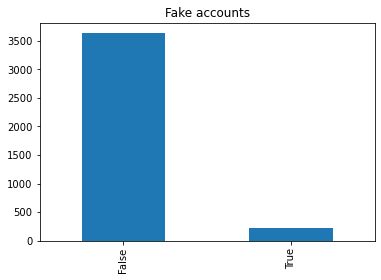

In [55]:
(df['malicious_account'].value_counts().plot(
        kind='bar',
        title='Fake accounts',
    )
);
plt.show()

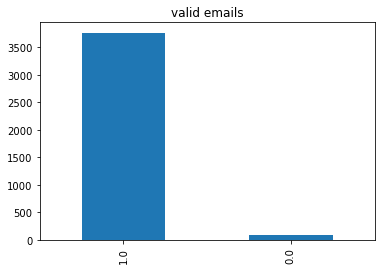

In [58]:
(df['emailScore'].value_counts().plot(
        kind='bar',
        title='valid emails',
    )
);

In [53]:
campaign_count= df.campaign.value_counts()
campaign_count
#We think there is existence three campaigns. We call them: legit, warriors, and fighters
#legit when the real id % >= 80, warriors when 60 < real id  % < 80 and fighters when real id % < 60

legit       3631
warriors     213
Name: campaign, dtype: int64

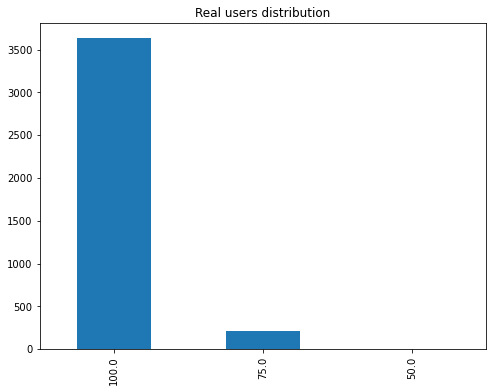

In [56]:
(df['isRealUser'].value_counts().plot(
        kind='bar',
        figsize=(8, 6),
        title='Real users distribution',
    )
);
plt.show()

<AxesSubplot:xlabel='campaign'>

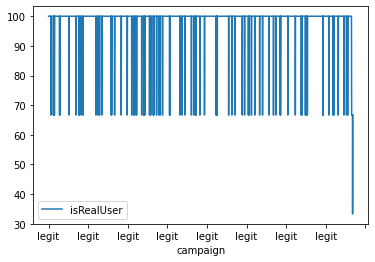

In [17]:
ax = plt.gca()
df.plot(kind='line',x='campaign',y='isRealUser',ax=ax)

In [23]:
test1 = df.groupby('city')['campaign']
test1

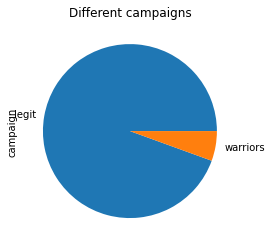

In [57]:
(df['campaign'].value_counts().plot(
        kind='pie',
        title='Different campaigns',
    )
);
plt.show()

In [24]:
tp = df.email.value_counts()
tp

paddy.byers@gmail.com                                        2
cs.wzpan@gmail.com                                           2
matt.huggins@gmail.com                                       2
steve.vezina@gmail.com                                       2
gonca.barbarosoglu@gmail.com                                 2
msellers@msellers.id.au                                      1
adin@scannell.ca                                             1
murat.okur@gmail.com                                         1
b@redtrails.com                                              1
cs200_f2021_14@stu.msu.edu                                   1
gregjohnson2020@gmail.com                                    1
buse.beserler@gmail.com                                      1
robert@cheramy.net                                           1
d.menshikov@creators.com.ua                                  1
ozsu.ozkara@duke.edu                                         1
justinkray@gmail.com                                   

In [127]:
tf = df[(df['city'] == 'London')]
tf

Unnamed: 0               created_at              account  \
209          209  2021-11-12 01:38:49 UTC           GregBowyer   
366          366  2021-11-12 02:40:20 UTC           NoelDavies   
490          490  2021-11-12 03:32:57 UTC        davidpeterson   
583          583  2021-11-12 04:09:12 UTC               drcjar   
593          593  2021-11-12 04:13:04 UTC               enigma   
814          814  2021-11-12 05:40:13 UTC              aif1990   
835          835  2021-11-12 05:49:05 UTC                 gm90   
952          952  2021-11-12 06:35:36 UTC               pornel   
962          962  2021-11-12 06:39:13 UTC        wendyabrantes   
972          972  2021-11-12 06:43:56 UTC             dburrows   
978          978  2021-11-12 06:45:52 UTC          paulbellamy   
1014        1014  2021-11-12 07:01:52 UTC  fredrikmollerstrand   
1060        1060  2021-11-12 07:20:36 UTC        michaelandrew   
1091        1091  2021-11-12 07:32:04 UTC        SteveMarshall   
1274        1274  2021-11-12 08:42:38 UTC           marlonicus   
1347        1347  2021-11-12 09:11:51 UTC               mnacos   
1461        1461  2021-11-12 09:57:04 UTC             itsash--   
1472        1472  2021-11-12 10:01:04 UTC             Jabbslad   
1486        1486  2021-11-12 10:06:23 UTC              Krishna   
1639        1639  2021-11-12 10:48:12 UTC                lozzd   
1650        1650  2021-11-12 10:51:20 UTC             Windlord   
1794        1794  2021-11-12 11:28:29 UTC              rouzbeh   
1925        1925  2021-11-12 12:02:51 UTC               agapow   
1942        1942  2021-11-12 12:08:00 UTC        arnaudlemaire   
1969        1969  2021-11-12 12:15:15 UTC           eliotsykes   
2332        2332  2021-11-12 13:57:51 UTC             avsmithy   
2425        2425  2021-11-12 14:27:07 UTC                zekus   
2429        2429  2021-11-12 14:28:26 UTC             whatterz   
2595        2595  2021-11-12 15:16:14 UTC              bwidlak   
2647        2647  2021-11-12 15:30:22 UTC         oneblacksock   
2667        2667  2021-11-12 15:35:36 UTC              piercer   
2812        2812  2021-11-12 16:20:56 UTC            mebassett   
2906        2906  2021-11-12 16:51:49 UTC      richardashworth   
3099        3099  2021-11-12 17:57:15 UTC           radicality   
3122        3122  2021-11-12 18:05:17 UTC           simonmayes   
3321        3321  2021-11-12 19:21:15 UTC                 r4vi   
3383        3383  2021-11-12 19:49:37 UTC             mjmartin   
3401        3401  2021-11-12 19:58:52 UTC           muratyaman   
3608        3608  2021-11-12 21:35:38 UTC           robyoung26   
3667        3667  2021-11-12 22:03:14 UTC              phamann   
3685        3685  2021-11-12 22:11:23 UTC             jdguzman   
3787        3787  2021-11-12 23:00:19 UTC             richardc   
3793        3793  2021-11-12 23:03:12 UTC          james2doyle   

                      name                 location  \
209            Greg Bowyer                   London   
366     Daniel Noel-Davies               London, UK   
490         David Peterson                   London   
583          Carl Reynolds                   London   
593            Andrea Ambu                   London   
814                    NaN               London, UK   
835            Gary McCann                   London   
952                 porneL                   London   
962                  Wendy                   London   
972          David Burrows                   London   
978           Paul Bellamy               London, UK   
1014  Fredrik Möllerstrand                   London   
1060        Michael Andrew                   London   
1091        Steve Marshall          London, England   
1274                Marlon                   London   
1347         Michael Nacos                   London   
1461        Ashley Meadows               London, UK   
1472        Jamie Atkinson                   London   
1486       Krishna Kotecha               London, UK   
1

In [130]:
ts = df.malicious_account.value_counts()
ts

False    3742
True      102
Name: malicious_account, dtype: int64

In [131]:
tr = df[(df['isRealUser'] < 100)]
tr

Unnamed: 0               created_at                account  \
29            29  2021-11-12 00:14:47 UTC          puppetMaster3   
61            61  2021-11-12 00:31:12 UTC          newvem-evgeny   
71            71  2021-11-12 00:36:29 UTC                twogood   
74            74  2021-11-12 00:38:04 UTC               felideon   
139          139  2021-11-12 01:09:51 UTC               sechilds   
142          142  2021-11-12 01:11:22 UTC                     NV   
259          259  2021-11-12 01:57:55 UTC                  dsghi   
346          346  2021-11-12 02:32:30 UTC                   icen   
381          381  2021-11-12 02:46:21 UTC                  qifly   
394          394  2021-11-12 02:52:03 UTC             paddybyers   
421          421  2021-11-12 03:04:02 UTC               alpinsky   
437          437  2021-11-12 03:10:13 UTC               massa_id   
599          599  2021-11-12 04:16:02 UTC               mhuggins   
623          623  2021-11-12 04:24:31 UTC               prcleary   
644          644  2021-11-12 04:33:19 UTC             jfairchild   
674          674  2021-11-12 04:45:44 UTC               akennedy   
793          793  2021-11-12 05:32:16 UTC                   btel   
796          796  2021-11-12 05:33:01 UTC        sabatierlaurent   
834          834  2021-11-12 05:48:24 UTC              vlaguzman   
918          918  2021-11-12 06:21:29 UTC             paddybyers   
994          994  2021-11-12 06:53:12 UTC              jDavidnet   
1050        1050  2021-11-12 07:16:24 UTC              amorawski   
1076        1076  2021-11-12 07:26:09 UTC                  Akson   
1088        1088  2021-11-12 07:31:03 UTC                 psychs   
1112        1112  2021-11-12 07:40:15 UTC           warricksothr   
1176        1176  2021-11-12 08:03:36 UTC            ChristophGr   
1204        1204  2021-11-12 08:16:04 UTC               koudelka   
1208        1208  2021-11-12 08:17:24 UTC                sybaik2   
1210        1210  2021-11-12 08:18:15 UTC                  mk-fg   
1215        1215  2021-11-12 08:19:55 UTC                kascote   
1275        1275  2021-11-12 08:43:04 UTC            paradiseHIT   
1290        1290  2021-11-12 08:49:06 UTC                  halka   
1323        1323  2021-11-12 09:01:43 UTC            shawnostler   
1328        1328  2021-11-12 09:03:37 UTC  vestibulum_vestibulum   
1364        1364  2021-11-12 09:18:53 UTC                 keiono   
1393        1393  2021-11-12 09:30:12 UTC               acechase   
1410        1410  2021-11-12 09:37:18 UTC            KenMcDonald   
1439        1439  2021-11-12 09:48:30 UTC              afriggeri   
1528        1528  2021-11-12 10:19:25 UTC            crazydog339   
1534        1534  2021-11-12 10:20:50 UTC                  arekt   
1658        1658  2021-11-12 10:53:09 UTC                lmmsoft   
1685        1685  2021-11-12 11:00:44 UTC           greenlion908   
1720        1720  2021-11-12 11:09:46 UTC            andrewglenn   
1804        1804  2021-11-12 11:31:18 UTC        mollis_molestie   
1835        1835  2021-11-12 11:39:12 UTC              sneakpeeq   
1859        1859  2021-11-12 11:45:49 UTC        ultrices_libero   
1863        1863  2021-11-12 11:46:44 UTC              guglielmo   
1910        1910  2021-11-12 11:59:15 UTC               pdorrell   
1969        1969  2021-11-12 12:15:15 UTC             eliotsykes   
2114        2114  2021-11-12 12:58:02 UTC         ticklishdog275   
2123        2123  2021-11-12 13:00:36 UTC            SteveVezina   
2130        2130  2021-11-12 13:03:02 UTC               recurser   
2274        2274  2021-11-12 13:42:49 UTC                 zmihai   
2315        2315  2021-11-12 13:52:40 UTC                  khaoz   
2351        2351  2021-11-12 14:03:48 UTC            proletarian   
2446        2446  2021-11-12 14:34:00 UTC              VinC0deur   
2475        2475  2021-11-12 14:42:02 UTC             liuhaotian   
2523        2523  2021-11-12 14:56:15 UTC            esilverbe

In [132]:
ps = tr['location']
ps

29                          SOMA SF
61                         Tel Aviv
71                  Ronneby, Sweden
74          Ft. Lauderdale, Florida
139                 Ottawa, Ontario
142                  Moscow, Russia
259            Kaneohe, Hawaii, USA
346                             NaN
381                             NaN
394                             NaN
421                             NaN
437                   Lubin, Poland
599                    Carteret, NJ
623                              UK
644                    New York, NY
674                  Charleston, SC
793                             NaN
796                      Casablanca
834                             NaN
918                             NaN
994               San Francisco, ca
1050                            NaN
1076               Clemson, SC, USA
1088                Santa Clara, CA
1112                            NaN
1176                            NaN
1204                            NYC
1208                Carnegie

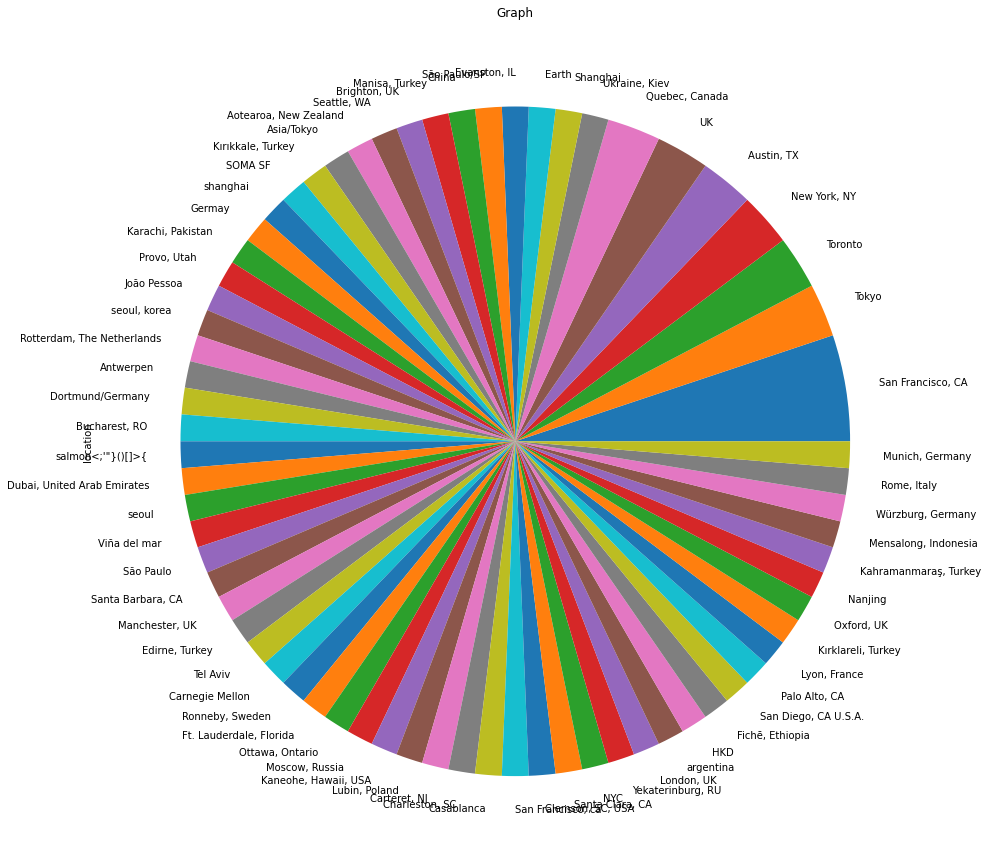

In [133]:
(tr['location'].value_counts().plot(
        kind='pie',
        figsize=(15, 20),
        title='Graph',
    )
);
plt.show()

In [144]:
df['code']= 'MMA'
df

Unnamed: 0               created_at                   account  \
0              0  2021-11-12 00:01:00 UTC                  msellers   
1              1  2021-11-12 00:01:33 UTC                       vdh   
2              2  2021-11-12 00:01:49 UTC                    notch8   
3              3  2021-11-12 00:02:09 UTC             vladi-miranda   
4              4  2021-11-12 00:02:46 UTC              linuxjuggler   
5              5  2021-11-12 00:03:03 UTC               loopingrage   
6              6  2021-11-12 00:03:23 UTC                  labeltop   
7              7  2021-11-12 00:03:56 UTC                      lisa   
8              8  2021-11-12 00:04:24 UTC                MattMcComb   
9              9  2021-11-12 00:04:52 UTC                wanpinglee   
10            10  2021-11-12 00:05:12 UTC              fpelliccioni   
11            11  2021-11-12 00:05:42 UTC                 visormatt   
12            12  2021-11-12 00:06:00 UTC              jwirfs-brock   
13            13  2021-11-12 00:06:18 UTC                  gforcada   
14            14  2021-11-12 00:06:50 UTC                   andrexx   
15            15  2021-11-12 00:07:21 UTC                   st-luke   
16            16  2021-11-12 00:07:55 UTC                  bojanliu   
17            17  2021-11-12 00:08:31 UTC                  jpercent   
18            18  2021-11-12 00:08:47 UTC                    dskeba   
19            19  2021-11-12 00:09:14 UTC                rickmvidal   
20            20  2021-11-12 00:09:51 UTC              fireball1725   
21            21  2021-11-12 00:10:06 UTC                    alexch   
22            22  2021-11-12 00:10:24 UTC                 brisebois   
23            23  2021-11-12 00:10:36 UTC                   robinsu   
24            24  2021-11-12 00:11:12 UTC                  khalid79   
25            25  2021-11-12 00:12:00 UTC                      gitt   
26            26  2021-11-12 00:12:37 UTC                 exantrius   
27            27  2021-11-12 00:13:18 UTC                    ZFGCCP   
28            28  2021-11-12 00:14:00 UTC                  degibenz   
29            29  2021-11-12 00:14:47 UTC             puppetMaster3   
30            30  2021-11-12 00:15:25 UTC                     d3en9   
31            31  2021-11-12 00:15:44 UTC                   aendrew   
32            32  2021-11-12 00:16:15 UTC              jesserobbins   
33            33  2021-11-12 00:16:41 UTC                  pomu0325   
34            34  2021-11-12 00:17:02 UTC                  shrtlist   
35            35  2021-11-12 00:17:10 UTC                   pfleidi   
36            36  2021-11-12 00:17:52 UTC            andersonsoares   
37            37  2021-11-12 00:18:35 UTC                  klangley   
38            38  2021-11-12 00:19:02 UTC                  plagnioj   
39            39  2021-11-12 00:19:53 UTC                 taranoble   
40            40  2021-11-12 00:20:18 UTC                    7pairs   
41            41  2021-11-12 00:20:45 UTC                  brixtoft   
42            42  2021-11-12 00:21:05 UTC                      rayb   
43            43  2021-11-12 00:21:46 UTC                silverwind   
44            44  2021-11-12 00:22:12 UTC                   chidori   
45            45  2021-11-12 00:22:46 UTC                    Xiaoli   
46            46  2021-11-12 00:23:25 UTC               elibarzilay   
47            47  2021-11-12 00:23:58 UTC              AByGCreation   
48            48  2021-11-12 00:24:30 UTC              keyvanfatehi   
49            49  2021-11-12 00:25:14 UTC                 tessekkur   
50            50  2021-11-12 00:25:50 UTC            jesperpedersen   
51            51  2021-11-12 00:26:05 UTC                  udayasri   
52            52  2021-11-12 00:26:41 UTC                      iong   
53            53  2021-11-12 00:27:22 UTC                    lars30   
54            54  2021-11-12 00:27:50 UTC                    endash   
55            55  2021-11-12 0